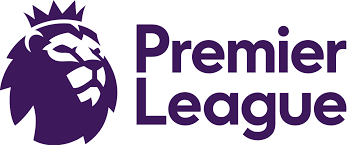

## Table of Contents

1. [Introduction]
2. [Reading in the Data]
3. [Creating Dataframes Based on Player Position]
4. [Linear Regression]
5. [Logistic Regression]
6. [Recommendation System]
7. [Feature Engineering]
8. [Recommendations]
9. [Next Steps]


### Introduction

Our company has been tasked with consulting your English Premier League club with top flight players to invest in. In the ever-evolving landscape of professional sports, the ability to identify and recruit top talent is paramount to a team's success. As player performances become increasingly data-driven, organizations are seeking innovative ways to leverage player statistics to gain a competitive edge. Our project embarks on a journey to harness the power of data analytics and machine learning to revolutionize player recruitment strategies.

The primary objective of this project is to develop a robust recommendation system that leverages historical player statistics to provide actionable insights for player recruitment. By meticulously analyzing player performance metrics across various positions, we aim to equip our organization with a data-backed approach to identifying potential star players.

The scope of this project encompasses several pivotal stages, each contributing to the comprehensive recommendation system:

   1. Data Acquisition and Preparation: We will meticulously gather and curate an extensive dataset containing player statistics. This dataset will serve as the foundation for our analysis.
   2. Segmentation by Position: Recognizing the unique dynamics and requirements of each player position, we will categorize players into distinct groups. This segmentation will enable us to tailor our analysis and recommendations to the specific demands of different roles on the field.
   3. Advanced Analytics Techniques: Employing a combination of linear and logistic regression, we will unravel key patterns and correlations hidden within the dataset. These analyses will help us identify statistical attributes that correlate with exceptional player performance.
   4. Recommendation System Development: Drawing on the insights gained from our analyses, we will construct a recommendation system that suggests potential players to recruit based on specific position requirements and desired performance metrics.
   5. Feature Engineering: To enhance the accuracy of our recommendations, we will explore various feature engineering techniques, transforming raw data into meaningful indicators of player potential.
   6. Actionable Insights: Through meticulous analysis and modeling, we will distill our findings into actionable insights and recommendations. These insights will empower our recruitment team to make well-informed and strategic decisions when signing players.
   7. Future Outlook: Finally, we will conclude by discussing the significance of our project's findings and propose potential avenues for further exploration, ensuring that our organization remains at the forefront of data-driven player recruitment strategies.

In an industry where the margin between victory and defeat can be razor-thin, our project aims to provide our organization with a decisive advantage. By harnessing the wealth of player statistics and employing sophisticated modeling techniques, we are confident in our ability to transform the way player recruitment is approached, ultimately contributing to our team's enduring success.


In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns



### Reading in the Data

In [365]:
stats = pd.read_csv('Player Statistics.csv')
stats

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [366]:
stats['Position'].value_counts()

Midfielder    198
Defender      194
Forward       110
Goalkeeper     69
Name: Position, dtype: int64

### Creating 4 Dataframes based on Player Position

In [367]:
# Seperating Goalkeepers from Position Players
gk_df = stats[stats['Position'] == 'Goalkeeper']

In [368]:
# Remove the rows where Position is 'Goalkeeper' from the original DataFrame
pos_stats = stats[stats['Position'] != 'Goalkeeper']


In [369]:
gk_df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
30,Tom Heaton,1.0,Aston-Villa,Goalkeeper,England,34.0,116,34,55,0,...,40.0,96.0,73.0,53.0,436.0,1023.0,5,0,2,NaN
31,Jed Steer,12.0,Aston-Villa,Goalkeeper,England,28.0,2,0,2,0,...,0.0,1.0,0.0,2.0,8.0,5.0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,David Martin,25.0,West-Ham-United,Goalkeeper,England,34.0,5,2,3,0,...,1.0,1.0,0.0,0.0,12.0,44.0,1,0,0,NaN
522,Darren Randolph,35.0,West-Ham-United,Goalkeeper,Ireland,33.0,31,10,14,0,...,6.0,33.0,8.0,15.0,97.0,262.0,1,0,0,NaN
523,Nathan Trott,34.0,West-Ham-United,Goalkeeper,England,21.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
549,Rui Patrício,11.0,Wolverhampton-Wanderers,Goalkeeper,Portugal,32.0,77,31,23,0,...,13.0,32.0,17.0,5.0,244.0,581.0,0,0,0,NaN


#### Removing irrelevant statistics for goalkeepers

In [370]:
# Set the threshold for NaN values
nan_threshold = 5

# Calculate the count of NaN values in each column
nan_value_count = gk_df.isna().sum()

# Identify columns where the count of NaN values is greater than the threshold
columns_to_drop = nan_value_count[nan_value_count > nan_threshold].index

# Drop the identified columns from the DataFrame
gk_df = gk_df.drop(columns=columns_to_drop)


In [371]:
gk_df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,1.0,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
30,Tom Heaton,1.0,Aston-Villa,Goalkeeper,England,34.0,116,34,55,0,...,3.0,40.0,96.0,73.0,53.0,436.0,1023.0,5,0,2
31,Jed Steer,12.0,Aston-Villa,Goalkeeper,England,28.0,2,0,2,0,...,0.0,0.0,1.0,0.0,2.0,8.0,5.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,David Martin,25.0,West-Ham-United,Goalkeeper,England,34.0,5,2,3,0,...,0.0,1.0,1.0,0.0,0.0,12.0,44.0,1,0,0
522,Darren Randolph,35.0,West-Ham-United,Goalkeeper,Ireland,33.0,31,10,14,0,...,1.0,6.0,33.0,8.0,15.0,97.0,262.0,1,0,0
523,Nathan Trott,34.0,West-Ham-United,Goalkeeper,England,21.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
549,Rui Patrício,11.0,Wolverhampton-Wanderers,Goalkeeper,Portugal,32.0,77,31,23,0,...,2.0,13.0,32.0,17.0,5.0,244.0,581.0,0,0,0


In [372]:
# Split the DataFrame into three separate DataFrames based on the "Position" column
defender_df = pos_stats[pos_stats['Position'] == 'Defender']
midfielder_df = pos_stats[pos_stats['Position'] == 'Midfielder']
forward_df = pos_stats[pos_stats['Position'] == 'Forward']

#### Removing irrelevant statistics for each position

In [373]:
defender_df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
5,William Saliba,4.0,Arsenal,Defender,France,19.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
6,Sokratis,5.0,Arsenal,Defender,Greece,32.0,44,21,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,18,0,56,1.0
7,Rob Holding,16.0,Arsenal,Defender,England,25.0,41,25,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Rúben Vinagre,29.0,Wolverhampton-Wanderers,Defender,Portugal,21.0,34,14,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,19,1.0
555,Maximilian Kilman,49.0,Wolverhampton-Wanderers,Defender,England,23.0,4,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0.0
556,Oskar Buur,59.0,Wolverhampton-Wanderers,Defender,Denmark,22.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
557,Marçal,5.0,Wolverhampton-Wanderers,Defender,Brazil,31.0,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0.0


In [374]:
# Drop columns with NaN values
defender_df = defender_df.dropna(axis=1)
defender_df

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Headed goals,...,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides
3,Héctor Bellerín,Arsenal,Defender,Spain,25.0,160,90,37,7,0.0,...,44.53,28.0,389.0,16%,31.0,144.0,23,0,125,8.0
4,Kieran Tierney,Arsenal,Defender,Scotland,23.0,16,7,5,1,0.0,...,32.44,1.0,45.0,18%,0.0,22.0,2,0,9,0.0
5,William Saliba,Arsenal,Defender,France,19.0,0,0,0,0,0.0,...,0.00,0.0,0.0,0%,0.0,0.0,0,0,0,0.0
6,Sokratis,Arsenal,Defender,Greece,32.0,44,21,11,3,1.0,...,54.91,4.0,1.0,1%,2.0,172.0,18,0,56,1.0
7,Rob Holding,Arsenal,Defender,England,25.0,41,25,9,0,0.0,...,53.66,0.0,3.0,67%,1.0,116.0,8,0,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Rúben Vinagre,Wolverhampton-Wanderers,Defender,Portugal,21.0,34,14,10,0,0.0,...,16.35,3.0,83.0,19%,1.0,14.0,2,0,19,1.0
555,Maximilian Kilman,Wolverhampton-Wanderers,Defender,England,23.0,4,2,1,0,0.0,...,25.25,0.0,0.0,0%,0.0,2.0,0,0,2,0.0
556,Oskar Buur,Wolverhampton-Wanderers,Defender,Denmark,22.0,1,1,0,0,0.0,...,14.00,0.0,0.0,0%,0.0,0.0,0,0,0,0.0
557,Marçal,Wolverhampton-Wanderers,Defender,Brazil,31.0,2,1,1,0,0.0,...,18.50,0.0,1.0,1%,0.0,2.0,1,0,1,0.0


In [375]:
midfielder_df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
13,Mesut Özil,10.0,Arsenal,Midfielder,Germany,31.0,184,100,39,33,...,NaN,NaN,NaN,NaN,NaN,NaN,13,0,95,83.0
14,Lucas Torreira,11.0,Arsenal,Midfielder,Uruguay,24.0,63,28,15,3,...,NaN,NaN,NaN,NaN,NaN,NaN,14,1,62,0.0
15,Ainsley Maitland-Niles,15.0,Arsenal,Midfielder,England,23.0,54,26,16,1,...,NaN,NaN,NaN,NaN,NaN,NaN,6,2,35,1.0
16,Mohamed Elneny,25.0,Arsenal,Midfielder,Egypt,28.0,47,29,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,7,1,24,2.0
17,Joseph Willock,28.0,Arsenal,Midfielder,England,21.0,33,12,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Romain Saïss,27.0,Wolverhampton-Wanderers,Midfielder,Morocco,30.0,54,24,16,5,...,NaN,NaN,NaN,NaN,NaN,NaN,17,1,72,2.0
562,João Moutinho,28.0,Wolverhampton-Wanderers,Midfielder,Portugal,34.0,78,32,23,2,...,NaN,NaN,NaN,NaN,NaN,NaN,11,0,95,3.0
563,Leander Dendoncker,32.0,Wolverhampton-Wanderers,Midfielder,Belgium,25.0,59,26,15,6,...,NaN,NaN,NaN,NaN,NaN,NaN,6,0,43,1.0
564,Vitinha,20.0,Wolverhampton-Wanderers,Midfielder,Portugal,20.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [376]:
midfielder_df = midfielder_df.dropna(axis=1)

In [377]:
forward_df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
23,Alexandre Lacazette,9.0,Arsenal,Forward,France,29.0,99,46,28,39,...,NaN,NaN,NaN,NaN,NaN,NaN,11,0,127,62.0
24,Pierre-Emerick Aubameyang,14.0,Arsenal,Forward,Gabon,31.0,87,43,25,55,...,NaN,NaN,NaN,NaN,NaN,NaN,4,1,30,55.0
25,Nicolas Pépé,19.0,Arsenal,Forward,Cote D'Ivoire,25.0,33,15,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,14,4.0
26,Reiss Nelson,24.0,Arsenal,Forward,England,20.0,20,10,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,8,4.0
27,Eddie Nketiah,30.0,Arsenal,Forward,England,21.0,23,12,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,18,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [378]:
# Drop columns with NaN values
forward_df = forward_df.dropna(axis=1)
forward_df

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Headed Clearance,Assists,Passes,Passes per match,Big chances created,Crosses,Yellow cards,Red cards,Fouls,Offsides
23,Alexandre Lacazette,Arsenal,Forward,France,29.0,99,46,28,39,0.39,...,35.0,16,2045,20.66,15.0,60.0,11,0,127,62.0
24,Pierre-Emerick Aubameyang,Arsenal,Forward,Gabon,31.0,87,43,25,55,0.63,...,12.0,13,1880,21.61,17.0,155.0,4,1,30,55.0
25,Nicolas Pépé,Arsenal,Forward,Cote D'Ivoire,25.0,33,15,9,5,0.15,...,2.0,6,723,21.91,8.0,113.0,4,0,14,4.0
26,Reiss Nelson,Arsenal,Forward,England,20.0,20,10,5,1,0.05,...,0.0,0,286,14.30,0.0,25.0,1,0,8,4.0
27,Eddie Nketiah,Arsenal,Forward,England,21.0,23,12,8,4,0.17,...,2.0,0,172,7.48,1.0,1.0,0,1,18,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,0.10,...,0.0,4,399,12.87,5.0,52.0,3,0,16,5.0
567,Raúl Jiménez,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,0.41,...,57.0,13,2108,27.03,26.0,57.0,7,0,81,52.0
568,Adama Traoré,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,0.05,...,13.0,12,1434,13.66,13.0,327.0,4,0,80,13.0
569,Fábio Silva,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,1.00,...,0.0,0,1,1.00,0.0,0.0,0,0,0,0.0


### Linear Regression for Each Position

##### Goalkeepers

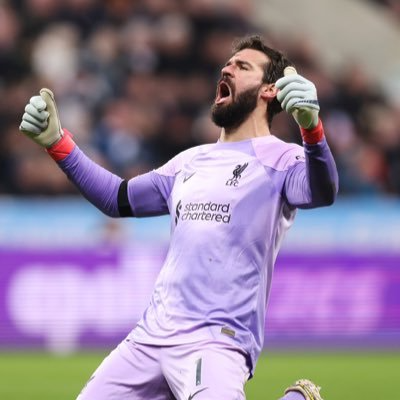

In [379]:
gk_df.value_counts()

Name               Jersey Number  Club                     Position    Nationality  Age   Appearances  Wins  Losses  Goals  Clean sheets  Goals conceded  Own goals  Errors leading to goal  Assists  Passes  Passes per match  Accurate long balls  Saves  Penalties saved  Punches  High Claims  Catches  Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  Red cards  Fouls
Ørjan Nyland       25.0           Aston-Villa              Goalkeeper  Norway       30.0  7            1     4       0      1.0           12.0            0.0        0.0                     0        152     21.71             35.0                 15.0   0.0              1.0      3.0          2.0      0.0                 29.0        53.0        0             0          0        1
David Martin       25.0           West-Ham-United          Goalkeeper  England      34.0  5            2     3       0      2.0           6.0             0.0        1.0                     0        111     22.20             40.0                 

In [380]:
# Split data into training and testing sets
gk_train, gk_test = train_test_split(gk_df, test_size=0.5)

In [381]:
# Define the feature columns for gk_df
gk_features = ['Clean sheets',  'Goals conceded',  'Own goals',  'Errors leading to goal', 'Saves', 'Penalties saved', 'Punches', 'High Claims', 'Catches', 'Accurate long balls', 'Sweeper clearances']


In [382]:
# Standard scale the feature data
scaler = StandardScaler()
gk_train_scaled = scaler.fit_transform(gk_train[gk_features])
gk_test_scaled = scaler.transform(gk_test[gk_features])

In [383]:
# Create linear regression model
gk_model = LinearRegression()

In [384]:
# Fit model
gk_model.fit(gk_train[gk_features], gk_train['Wins'])


LinearRegression()

In [385]:
# Make predictions
gk_predictions = gk_model.predict(gk_test[gk_features])

In [386]:
# Evaluate model
gk_mse = mean_squared_error(gk_test['Wins'], gk_predictions)
gk_r2 = r2_score(gk_test['Wins'], gk_predictions)

# Print evaluation metrics for gk_df
print("Goalkeeper Model - MSE:", gk_mse)
print("Goalkeeper Model - R-squared:", gk_r2)

Goalkeeper Model - MSE: 504.3903141966681
Goalkeeper Model - R-squared: 0.5728502213660438


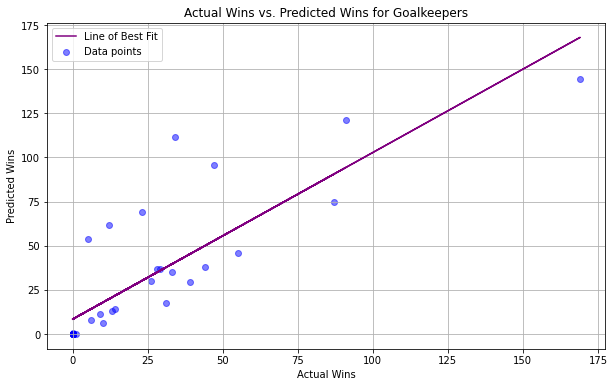

In [387]:
# Calculate the line of best fit
slope, intercept = np.polyfit(gk_test['Wins'], gk_predictions, 1)
line_of_best_fit = slope * gk_test['Wins'] + intercept

# Plot actual wins vs. predicted wins with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(gk_test['Wins'], gk_predictions, color='blue', alpha=0.5, label='Data points')
plt.plot(gk_test['Wins'], line_of_best_fit, color='purple', label='Line of Best Fit')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins for Goalkeepers')
plt.grid(True)
plt.legend()
plt.show()

##### Defenders

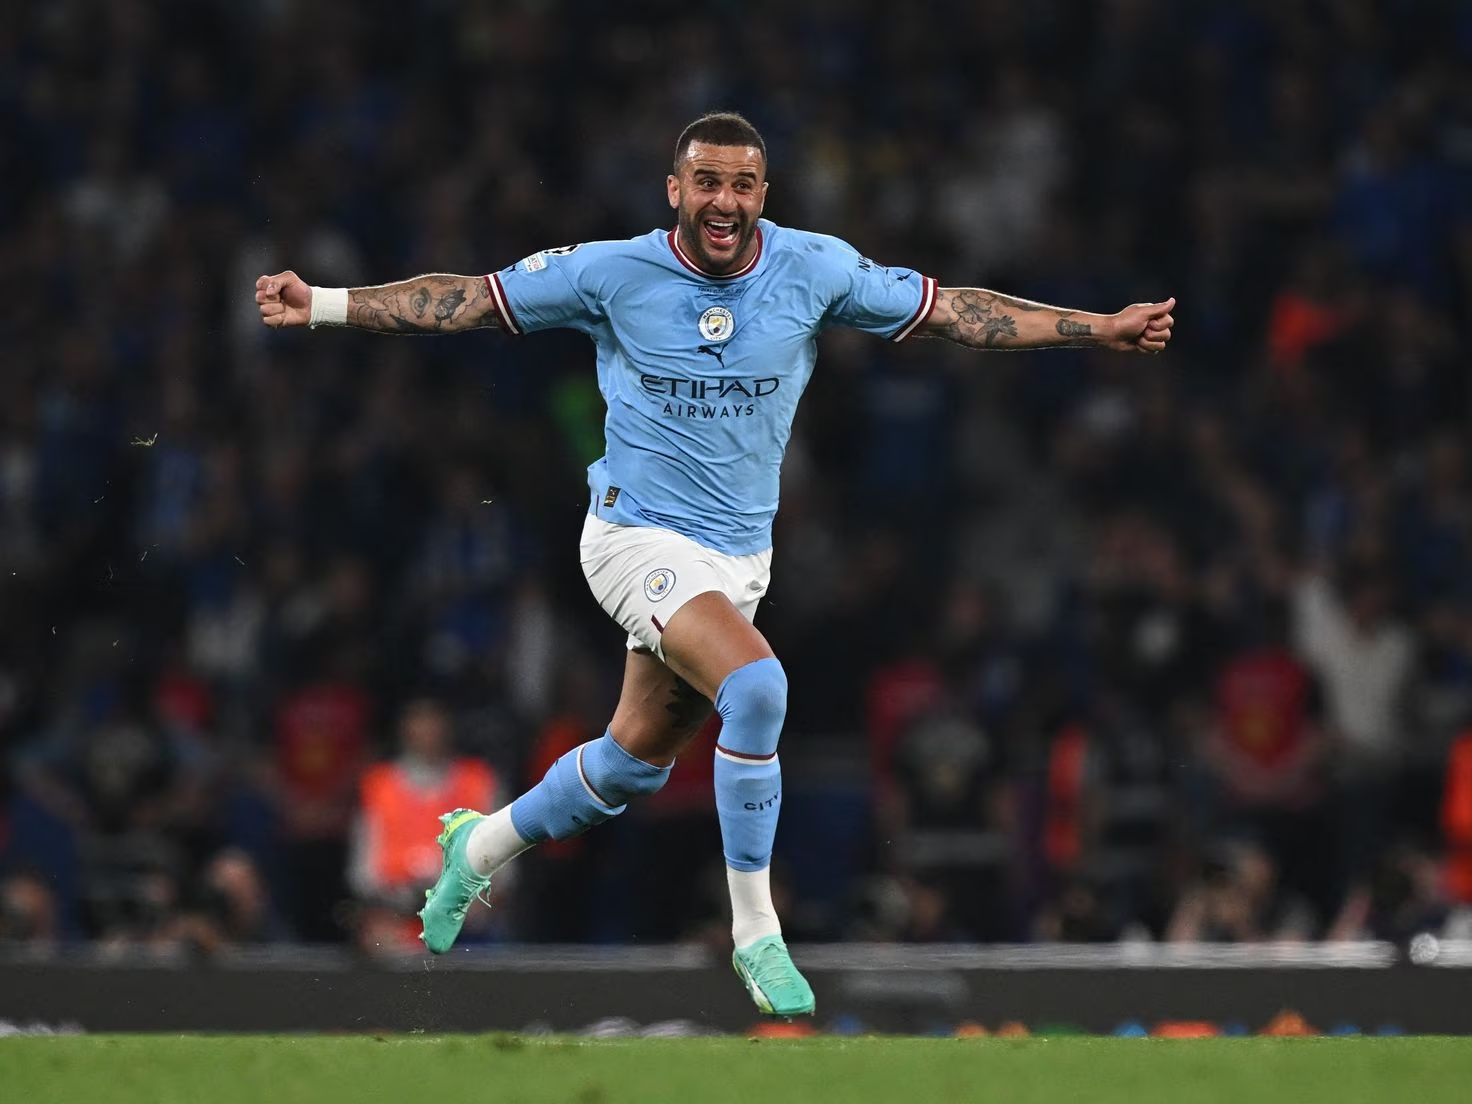

In [388]:
# Split data into training and testing sets
defender_train, defender_test = train_test_split(defender_df, test_size=0.5)


In [389]:
# Define the feature columns for defender_df
defender_features = ['Tackles','Blocked shots', 'Interceptions', 'Clearances','Headed Clearance', 'Recoveries', 'Duels won', 'Duels lost', 'Successful 50/50s', 'Aerial battles won','Aerial battles lost', 'Errors leading to goal','Red cards' ] 


In [390]:
# Standard scale the feature data
scaler = StandardScaler()
defender_train_scaled = scaler.fit_transform(defender_train[defender_features])
defender_test_scaled = scaler.transform(defender_test[defender_features])


In [391]:
# Create linear regression model
defender_model = LinearRegression()

In [392]:
# Fit model
defender_model.fit(defender_train[defender_features], defender_train['Wins'])

LinearRegression()

In [393]:
# Make predictions
defender_predictions = defender_model.predict(defender_test[defender_features])

In [394]:
# Evaluate model
defender_mse = mean_squared_error(defender_test['Wins'], defender_predictions)
defender_r2 = r2_score(defender_test['Wins'], defender_predictions)

# Print evaluation metrics for defender_df
print("Defender Model - MSE:", defender_mse)
print("Defender Model - R-squared:", defender_r2)

Defender Model - MSE: 330.4604084370528
Defender Model - R-squared: 0.8167734382890983


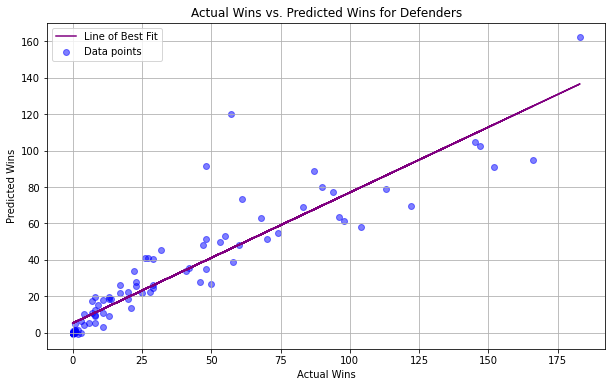

In [395]:
# Calculate the line of best fit
slope, intercept = np.polyfit(defender_test['Wins'], defender_predictions, 1)
line_of_best_fit = slope * defender_test['Wins'] + intercept

# Plot actual wins vs. predicted wins with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(defender_test['Wins'], defender_predictions, color='blue', alpha=0.5, label='Data points')
plt.plot(defender_test['Wins'], line_of_best_fit, color='purple', label='Line of Best Fit')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins for Defenders')
plt.grid(True)
plt.legend()
plt.show()

##### Midfielders

![De Bruyne.jpg](<attachment:De Bruyne.jpg>)
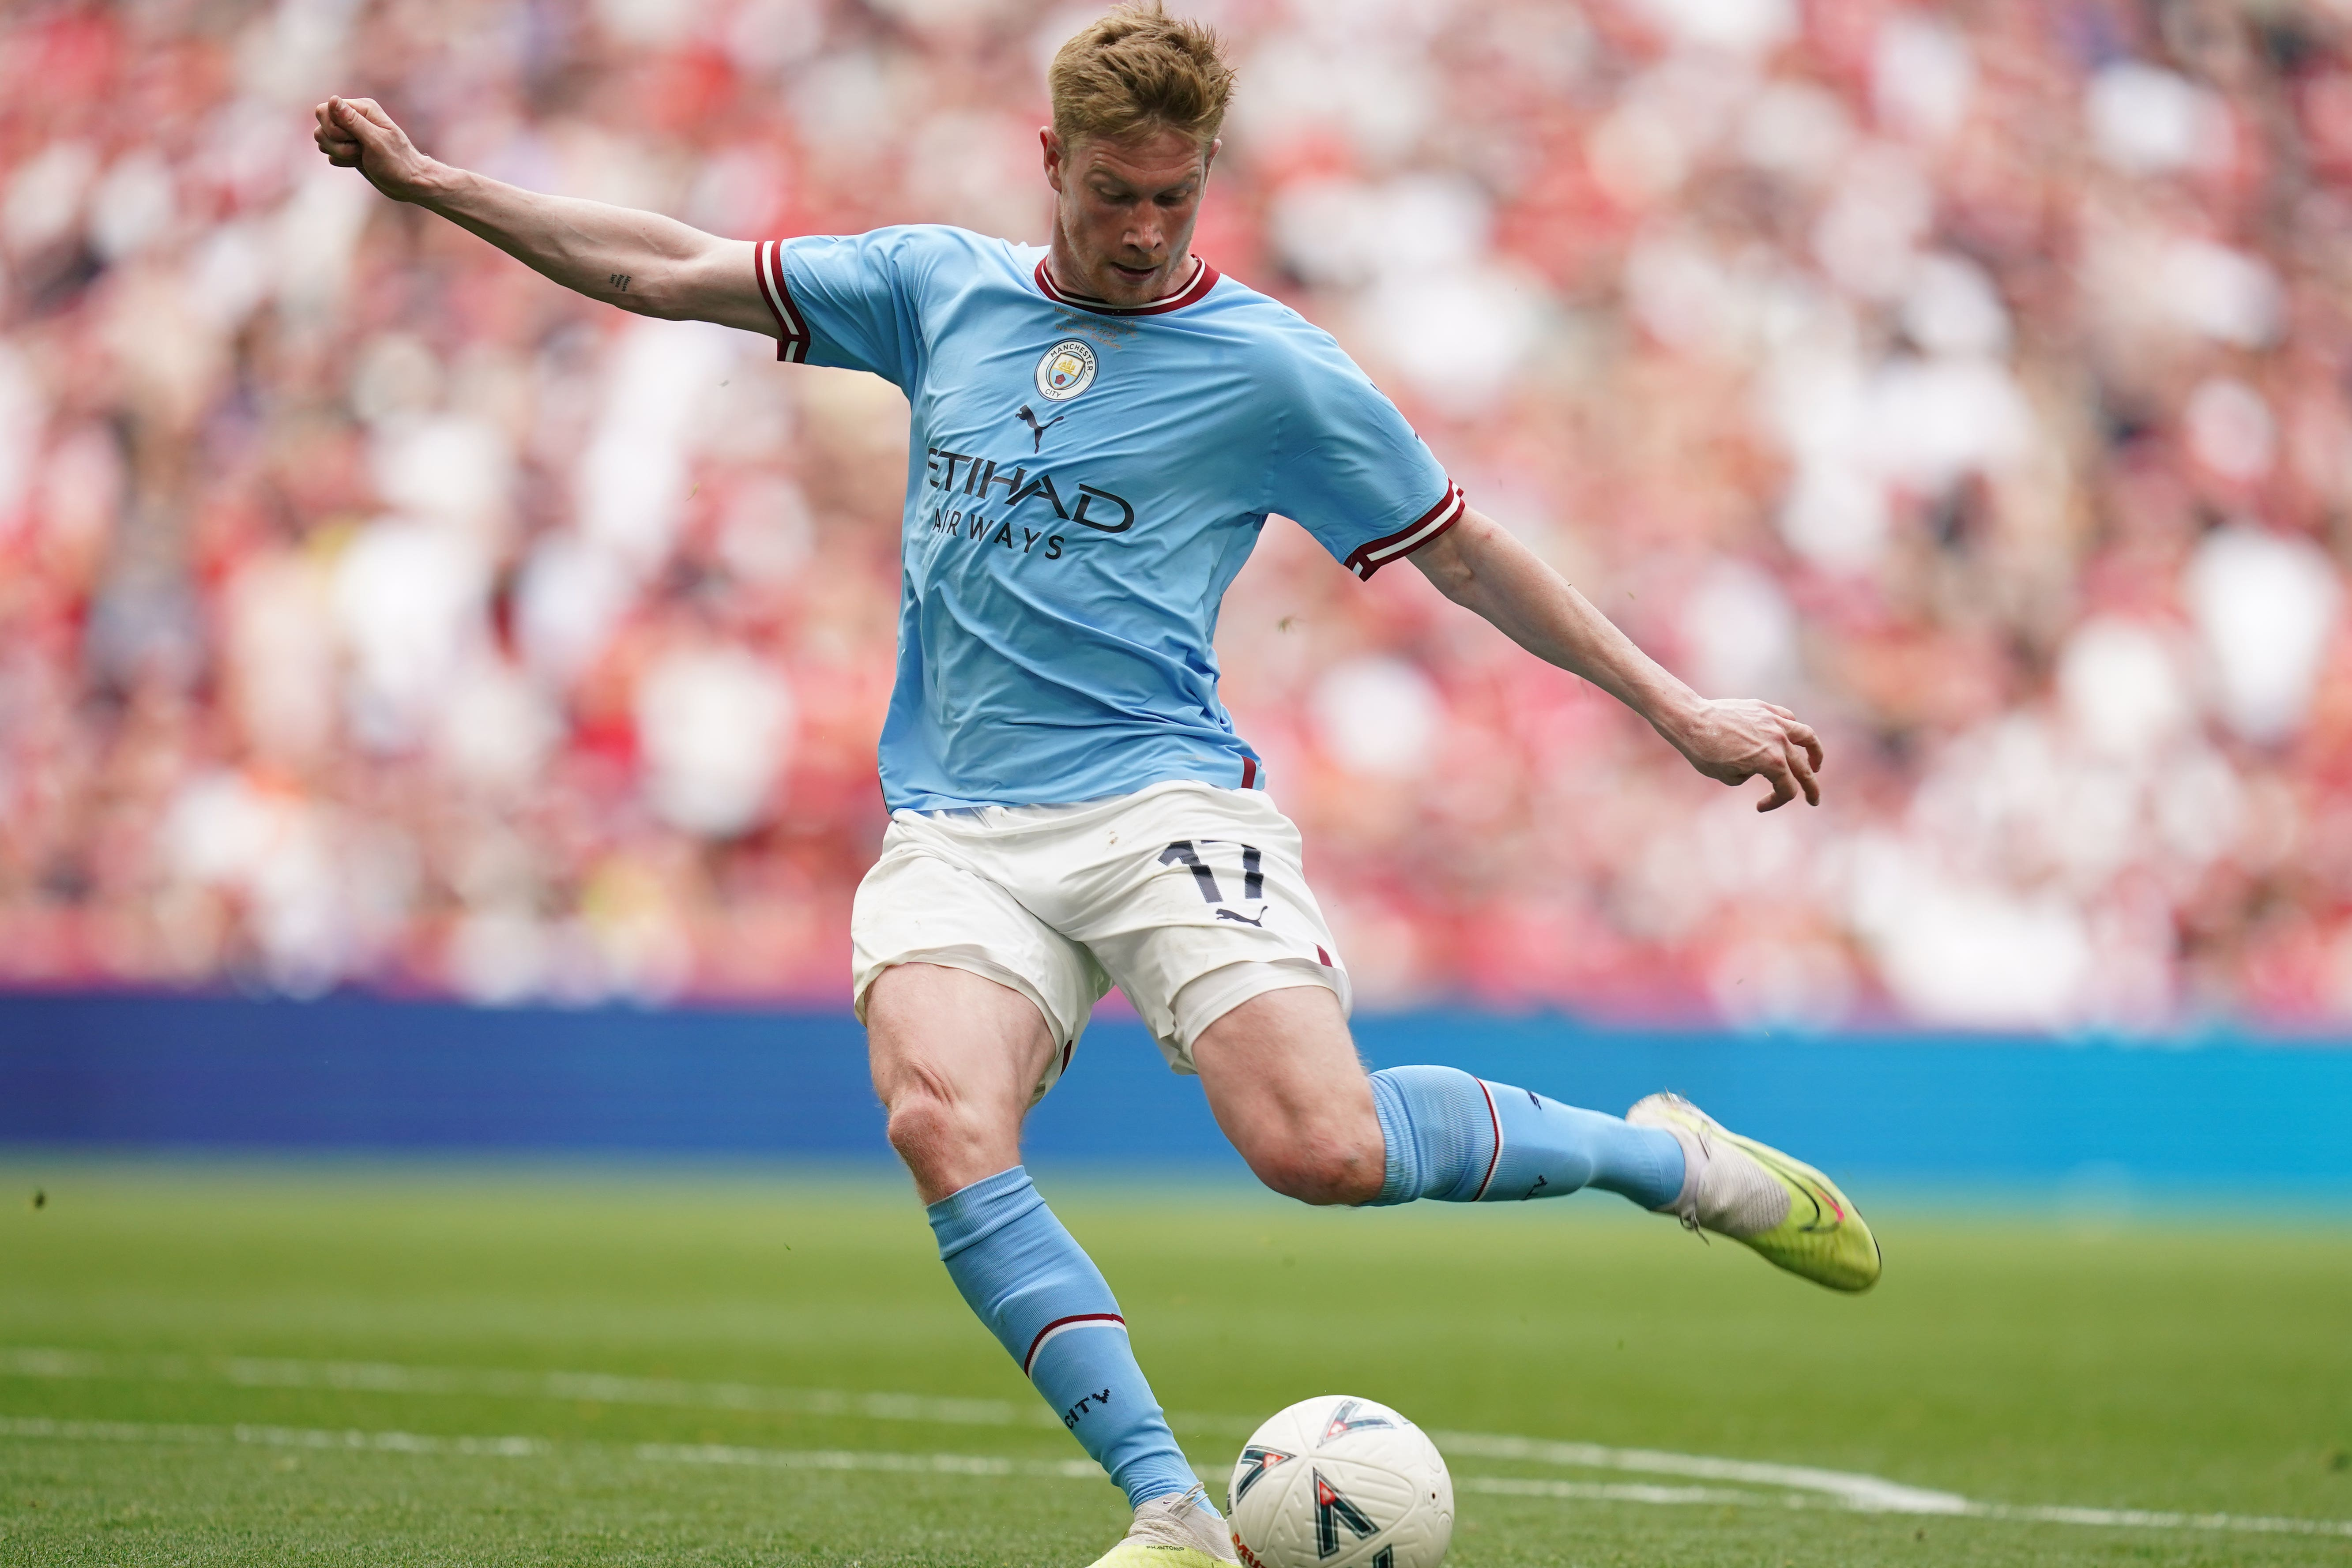

In [396]:
midfielder_df.value_counts()

Name                Club                  Position    Appearances  Wins  Losses  Goals  Headed goals  Goals with right foot  Goals with left foot  Hit woodwork  Tackles  Blocked shots  Interceptions  Clearances  Headed Clearance  Assists  Passes  Passes per match  Big chances created  Crosses  Yellow cards  Red cards  Fouls  Offsides
Zak Brunt           Sheffield-United      Midfielder  0            0     0       0      0.0           0.0                    0.0                   0.0           0.0      0.0            0.0            0.0         0.0               0        0       0.00              0.0                  0.0      0             0          0      0.0         1
Jack Harrison       Leeds-United          Midfielder  2            1     1       1      0.0           1.0                    0.0                   0.0           3.0      1.0            2.0            0.0         0.0               0        47      23.50             0.0                  4.0      0             0          1  

In [397]:
# Split data into training and testing sets
midfielder_train, midfielder_test = train_test_split(midfielder_df, test_size=0.5)


In [398]:
# Define the feature columns for gk_df
midfielder_features =['Goals', 'Assists', 'Tackles','Interceptions','Crosses','Passes']

In [399]:
# Exclude the columns you don't want to use
excluded_columns = ['Jersey Number', 'Club', 'Nationality' 'Appearances','Own goals', 'Last man tackles', 'Clearances off line', 'Shooting accuracy %', 'Tackle success %', 'Cross accuracy %']
midfielder_features = [col for col in midfielder_features if col not in excluded_columns]


In [400]:
# Standard scale the feature data
scaler = StandardScaler()
midfielder_train_scaled = scaler.fit_transform(midfielder_train[midfielder_features])
midfielder_test_scaled = scaler.transform(midfielder_test[midfielder_features])


In [401]:
# Create linear regression model
midfielder_model = LinearRegression()

In [402]:
# Fit model with scaled data
midfielder_model.fit(midfielder_train_scaled, midfielder_train['Wins'])

LinearRegression()

In [403]:
# Make predictions with scaled test data
midfielder_predictions = midfielder_model.predict(midfielder_test_scaled)

In [404]:
# Evaluate model
midfielder_mse = mean_squared_error(midfielder_test['Wins'], midfielder_predictions)
midfielder_r2 = r2_score(midfielder_test['Wins'], midfielder_predictions)

# Print evaluation metrics for midfielders_df
print("Midfielder Model - MSE:", midfielder_mse)
print("Midfielder Model - R-squared:", midfielder_r2)

Midfielder Model - MSE: 210.12354237367543
Midfielder Model - R-squared: 0.888523441571188


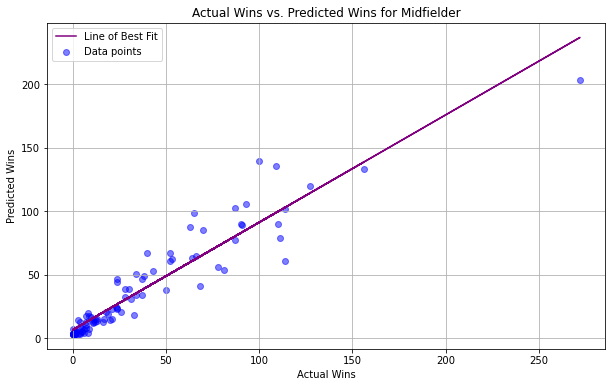

In [405]:
# Calculate the line of best fit
slope, intercept = np.polyfit(midfielder_test['Wins'], midfielder_predictions, 1)
line_of_best_fit = slope * midfielder_test['Wins'] + intercept

# Plot actual wins vs. predicted wins with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(midfielder_test['Wins'], midfielder_predictions, color='blue', alpha=0.5, label='Data points')
plt.plot(midfielder_test['Wins'], line_of_best_fit, color='purple', label='Line of Best Fit')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins for Midfielder')
plt.grid(True)
plt.legend()
plt.show()

##### Forwards

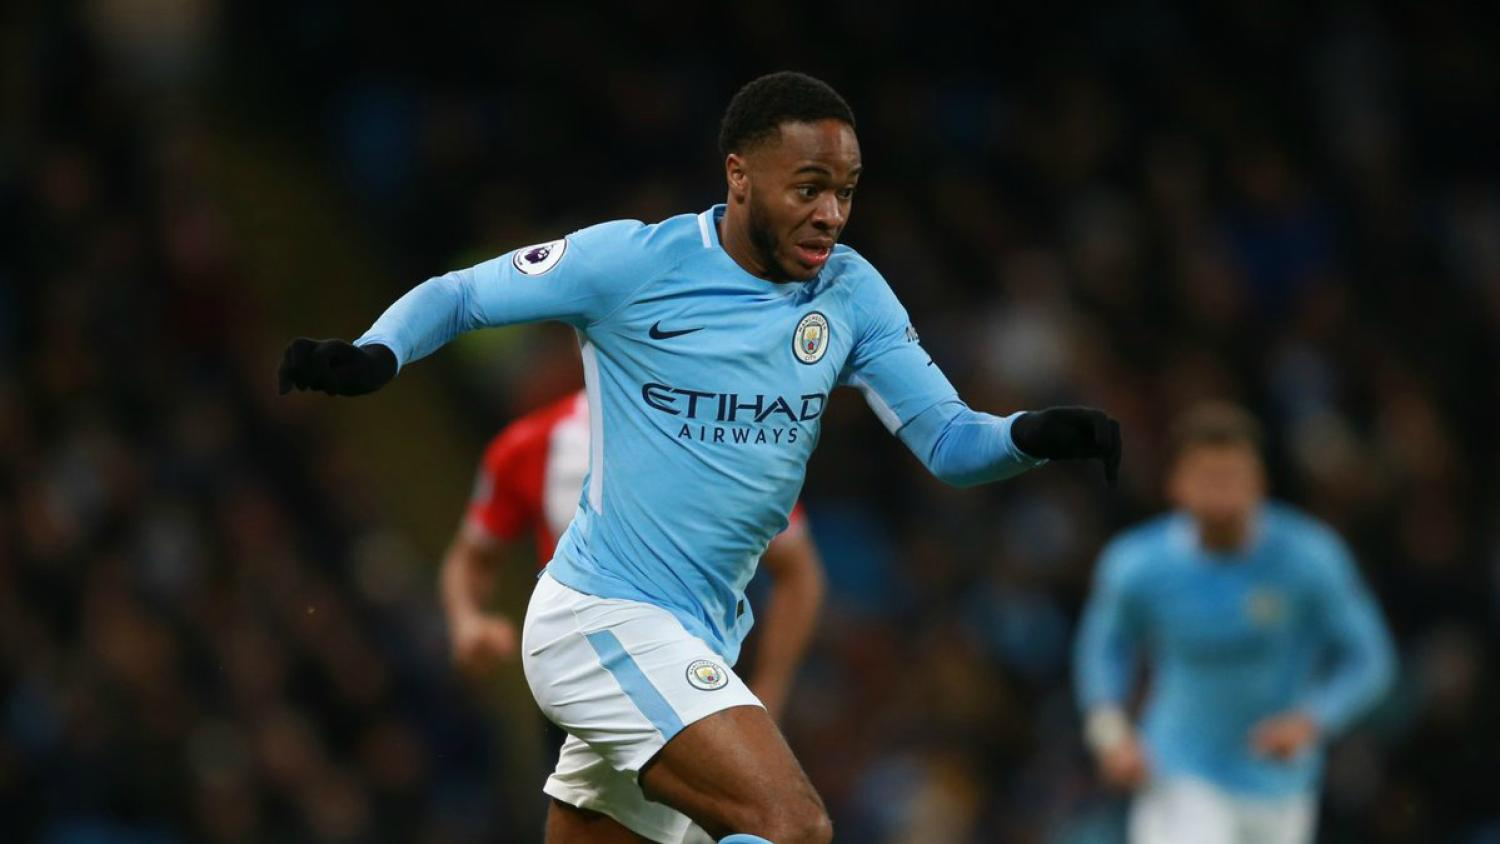

In [406]:
# Split data into training and testing sets
forward_train, forward_test = train_test_split(forward_df, test_size=0.5)

In [407]:
forward_features = ['Goals', 'Assists','Shots','Shots on target','Crosses','Passes']

In [408]:
# Exclude the columns you don't want to use
excluded_columns = ['Jersey Number', 'Club', 'Nationality', 'Age', 'Appearances', 'Red Cards','Recoveries','Duels won', 'Duels lost', 'Successful 50/50s', 'Aerial battles won','Aerial battles lost','Errors leading to goal','Through balls', 'Accurate long balls', 'Shooting accuracy %', 'Tackle success %', 'Cross accuracy %']
forward_features = [col for col in forward_features if col not in excluded_columns]


In [409]:
# Standard scale the feature data
scaler = StandardScaler()
forward_train_scaled = scaler.fit_transform(forward_train[forward_features])
forward_test_scaled = scaler.transform(forward_test[forward_features])

In [410]:
# Create linear regression model
forward_model = LinearRegression()

In [411]:
# Fit model with scaled data
forward_model.fit(forward_train_scaled, forward_train['Wins'])

LinearRegression()

In [412]:
# Make predictions with scaled test data
forward_predictions = forward_model.predict(forward_test_scaled)

In [413]:
# Evaluate model
forward_mse = mean_squared_error(forward_test['Wins'], forward_predictions)
forward_r2 = r2_score(forward_test['Wins'], forward_predictions)

# Print evaluation metrics for forwards_df
print("Forward Model - MSE:", forward_mse)
print("Forward Model - R-squared:", forward_r2)

Forward Model - MSE: 83.8545648298045
Forward Model - R-squared: 0.9172520420759344


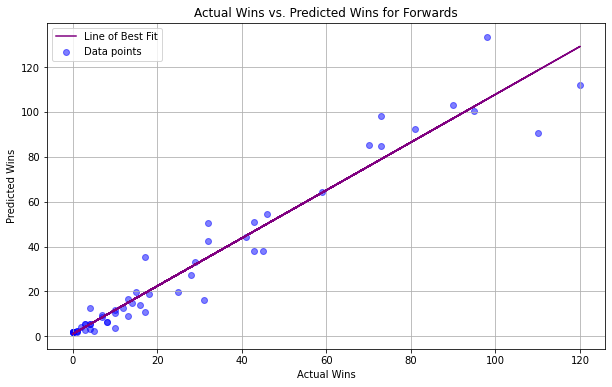

In [414]:

# Calculate the line of best fit
slope, intercept = np.polyfit(forward_test['Wins'], forward_predictions, 1)
line_of_best_fit = slope * forward_test['Wins'] + intercept

# Plot actual wins vs. predicted wins with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(forward_test['Wins'], forward_predictions, color='blue', alpha=0.5, label='Data points')
plt.plot(forward_test['Wins'], line_of_best_fit, color='purple', label='Line of Best Fit')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins for Forwards')
plt.grid(True)
plt.legend()
plt.show()

### Logistic Regression

##### Goalkeeper

In [415]:
gk_df['High Performer'] = gk_df['Wins'] / gk_df['Appearances'] >= 0.4

In [416]:
# Define features and target variable
selected_features = ['Clean sheets', 'Goals conceded', 'Saves', 'Errors leading to goal','Punches','Catches','High Claims']
X = gk_df[selected_features]
y = gk_df['High Performer']

In [417]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [418]:
# Create a Logistic Regression model
gk_model = LogisticRegression()


In [419]:
# Train the model on the training data
gk_model.fit(X_train, y_train)

LogisticRegression()

In [420]:
# Make predictions on the testing data
y_pred = gk_model.predict(X_test)

In [421]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.89      0.80         9
        True       0.67      0.40      0.50         5

    accuracy                           0.71        14
   macro avg       0.70      0.64      0.65        14
weighted avg       0.71      0.71      0.69        14

Confusion Matrix:
 [[8 1]
 [3 2]]


Based on the analysis performed above, our logistic regression model can accurately predict that a goalkeeper will be a "high performer" using the features 'Clean sheets', 'Goals conceded', 'Saves', 'Errors leading to goal','Punches','Catches','High Claims' at an 71.4% rate. This model is performing well and we would like to implement this model using these features in order to predict future goalkeeper talent.

##### Defender

In [422]:
defender_df['High Performer'] = defender_df['Wins'] / defender_df['Appearances'] >= 0.4

<ipython-input-422-9d2217c1dfed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defender_df['High Performer'] = defender_df['Wins'] / defender_df['Appearances'] >= 0.4


In [423]:
# Define features and target variable
selected_features = ['Goals', 'Assists', 'Tackles','Blocked shots','Interceptions','Clearances','Headed Clearance','Recoveries','Duels won','Successful 50/50s','Aerial battles won']
X = defender_df[selected_features]
y = defender_df['High Performer']

In [424]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [425]:
# Create a Logistic Regression model
defender_model = LogisticRegression()


In [426]:
# Train the model on the training data
defender_model.fit(X_train, y_train)

c:\Users\NCG\anaconda3Flatiron\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [427]:
# Make predictions on the testing data
y_pred = defender_model.predict(X_test)

In [428]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5384615384615384
Classification Report:
               precision    recall  f1-score   support

       False       0.55      0.86      0.67        21
        True       0.50      0.17      0.25        18

    accuracy                           0.54        39
   macro avg       0.52      0.51      0.46        39
weighted avg       0.52      0.54      0.47        39

Confusion Matrix:
 [[18  3]
 [15  3]]


Based on the analysis performed above, our logistic regression model can accurately predict that a defender will be a "high performer" using the features 'Goals', 'Assists', 'Tackles','Blocked shots','Interceptions','Clearances','Headed Clearance','Recoveries','Duels won','Successful 50/50s','Aerial battles won' at an 53.8% rate. This model is performing poorly compared to the other positions. This is may be attributed to the lack of contributions in the 'Goals' and 'Assists' features that are important to winning a match.

##### Midfielder

In [429]:
midfielder_df['High Performer'] = midfielder_df['Wins'] / midfielder_df['Appearances'] >= 0.4

<ipython-input-429-16348764ce8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfielder_df['High Performer'] = midfielder_df['Wins'] / midfielder_df['Appearances'] >= 0.4


In [430]:
# Define features and target variable
selected_features = ['Goals', 'Assists', 'Tackles','Interceptions','Crosses','Passes']
X = midfielder_df[selected_features]
y = midfielder_df['High Performer']

In [431]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [432]:
# Create a Logistic Regression model
midfielder_model = LogisticRegression()


In [433]:
# Train the model on the training data
midfielder_model.fit(X_train, y_train)

c:\Users\NCG\anaconda3Flatiron\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [434]:
# Make predictions on the testing data
y_pred = midfielder_model.predict(X_test)

In [435]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.65      0.68        23
        True       0.58      0.65      0.61        17

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.66      0.65      0.65        40

Confusion Matrix:
 [[15  8]
 [ 6 11]]


Based on the analysis performed above, our logistic regression model can accurately predict that a midfielder will be a "high performer" using the features 'Goals', 'Assists', 'Tackles','Interceptions','Crosses','Passes' at a 65% rate. This model is performing well and we would like to implement this model using these features in order to predict future midfielder talent.

##### Forwards

In [436]:
forward_df['High Performer'] = forward_df['Wins'] / forward_df['Appearances'] >= 0.4

<ipython-input-436-41d7f7fcde84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forward_df['High Performer'] = forward_df['Wins'] / forward_df['Appearances'] >= 0.4


In [437]:
# Define features and target variable
selected_features = ['Goals', 'Assists','Shots','Shots on target','Crosses','Passes']
X = forward_df[selected_features]
y = forward_df['High Performer']

In [438]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [439]:
# Create a Logistic Regression model
forward_model = LogisticRegression()


In [440]:
# Train the model on the training data
forward_model.fit(X_train, y_train)

c:\Users\NCG\anaconda3Flatiron\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [441]:
# Make predictions on the testing data
y_pred = forward_model.predict(X_test)

In [442]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.80      0.83        15
        True       0.62      0.71      0.67         7

    accuracy                           0.77        22
   macro avg       0.74      0.76      0.75        22
weighted avg       0.78      0.77      0.78        22

Confusion Matrix:
 [[12  3]
 [ 2  5]]


Based on the analysis performed above, our logistic regression model can accurately predict that a forward  will be a "high performer" using the features 'Goals', 'Assists','Shots','Shots on target','Crosses','Passes' at an 77.2% rate. This model is performing well and we would like to implement this model using these features in order to predict future forward talent.

#### Recommendation System that Recommends Top 10 Players to Buy

##### Goalkeepers

In [443]:
# Normalize the data 
gk_df_normalized = gk_df.copy()
columns_to_normalize = ['Clean sheets', 'Goals conceded', 'Saves']
gk_df_normalized[columns_to_normalize] = gk_df_normalized[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


In [444]:
# Define weights for each variable 
weights = {'Clean sheets': 0.4, 'Goals conceded': 0.3, 'Saves': 0.3}


In [445]:
# Calculate a weighted score for each goalkeeper
gk_df_normalized['Score'] = gk_df_normalized.apply(lambda row: 
    row['Clean sheets'] * weights['Clean sheets'] +
    (1 - row['Goals conceded']) * weights['Goals conceded'] +
    row['Saves'] * weights['Saves'], axis=1)

In [446]:
# Sort the goalkeepers by score in descending order to get the top 10 recommendations
top_10_gks = gk_df_normalized.sort_values(by='Score', ascending=False).head(10)

print(top_10_gks[['Name', 'Score']])

                  Name     Score
462           Joe Hart  0.700000
347       David de Gea  0.684967
460        Hugo Lloris  0.596916
255  Kasper Schmeichel  0.488903
520   Lukasz Fabianski  0.482337
320            Ederson  0.461344
288             Adrián  0.422633
287            Alisson  0.416315
438     Fraser Forster  0.405896
173    Jordan Pickford  0.396218


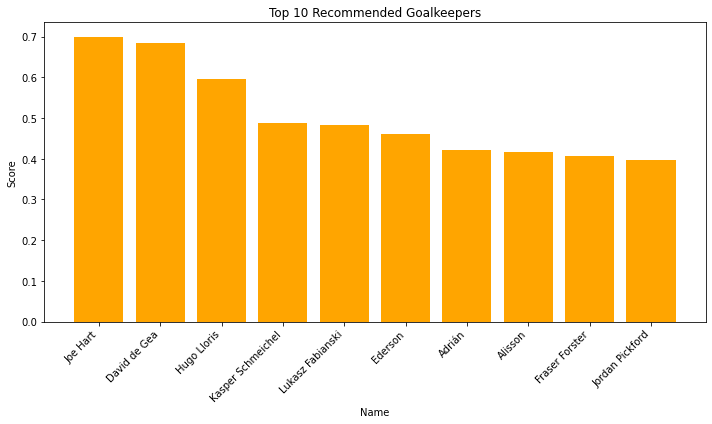

In [447]:
# Plotting the scores
plt.figure(figsize=(10, 6))
plt.bar(top_10_gks['Name'], top_10_gks['Score'], color='orange')
plt.xlabel('Name')
plt.ylabel('Score')
plt.title('Top 10 Recommended Goalkeepers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

As we conclude our meticulous analysis aimed at optimizing player recruitment, a constellation of goalkeeping luminaries emerges as invaluable assets for our premier club. Among these stellar options, David de Gea, Hugo Lloris, Ederson, and Alisson stand out as defining choices to bolster our squad's goalkeeping prowess. Their impeccable records and consistent excellence on the field underline their significance as guardians of our team's ambitions. In the landscape of professional sports, where steadfast reliability and strategic agility are paramount, the collective strengths of these elite goalkeepers promise to elevate our defensive capabilities to new heights. With this quartet, our premier club embraces a future fortified by a calculated blend of experience, skill, and unwavering commitment to excellence.

##### Defenders

In [448]:
# Define the target variables
target_columns = ['Goals', 'Assists', 'Tackles', 'Blocked shots', 'Interceptions', 
                  'Clearances', 'Headed Clearance', 'Recoveries', 'Duels won', 
                  'Successful 50/50s', 'Aerial battles won']


In [449]:
# Select only the relevant columns from the dataframe
defender_data = defender_df[target_columns]

In [450]:
# Normalize the data
scaler = StandardScaler()
defender_data_scaled = scaler.fit_transform(defender_data)

In [451]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
defender_data_pca = pca.fit_transform(defender_data_scaled)

In [452]:
# Apply KMeans clustering to group defenders
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
defender_clusters = kmeans.fit_predict(defender_data_scaled)

In [453]:
# Add cluster labels to the dataframe
defender_df['Cluster'] = defender_clusters

<ipython-input-453-b7fec9e65bd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defender_df['Cluster'] = defender_clusters


In [454]:
# Calculate a score for each defender based on the target variables
defender_df['Score'] = defender_data_scaled.sum(axis=1)

<ipython-input-454-d00104162091>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defender_df['Score'] = defender_data_scaled.sum(axis=1)


In [455]:
# Sort defenders by score in descending order and select the top 10 recommendations
top_10_defenders = defender_df.sort_values(by='Score', ascending=False).head(10)

print(top_10_defenders[['Name', 'Score']])

                   Name      Score
151         Gary Cahill  39.451655
419       Phil Jagielka  35.793613
324         Kyle Walker  29.825418
180      Séamus Coleman  27.345618
504  Branislav Ivanovic  27.198440
261         Jonny Evans  26.278860
122   César Azpilicueta  25.008581
148       James Tomkins  24.561935
99        Phil Bardsley  21.655845
149          Scott Dann  19.676000


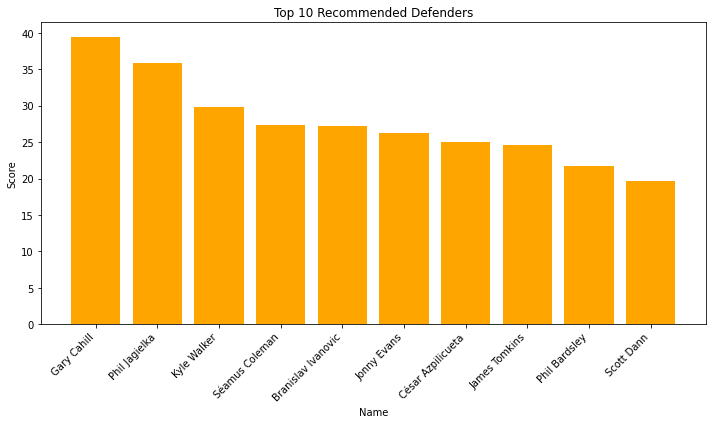

In [456]:
# Plotting the scores
plt.figure(figsize=(10, 6))
plt.bar(top_10_defenders['Name'], top_10_defenders['Score'], color='orange')
plt.xlabel('Name')
plt.ylabel('Score')
plt.title('Top 10 Recommended Defenders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In harnessing data analytics for strategic player recruitment, our analysis positions Kyle Walker as an exceptional defensive signing for our premier club. Walker's consistently strong performances and versatile play style mark him as a prime candidate. Notably, as some top recommended defenders approach their career twilight, Walker's peak performance phase aligns with our recruitment objectives, providing both reliability and dynamism to our defense. Our recommendation to sign Walker encapsulates a calculated move to fortify our squad's defensive prowess while embracing the evolving landscape of data-driven decisions in the world of professional sports.

##### Midfielders

In [457]:
# Define the target variables
target_columns = ['Goals', 'Assists', 'Tackles', 'Interceptions', 'Crosses', 'Passes']

In [458]:
# Select only the relevant columns from the dataframe
midfielder_data = midfielder_df[target_columns]

In [459]:
# Normalize the data
scaler = StandardScaler()
midfielder_data_scaled = scaler.fit_transform(midfielder_data)

In [460]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
midfielder_data_pca = pca.fit_transform(midfielder_data_scaled)

In [461]:
# Apply KMeans clustering to group midfielders
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
midfielder_clusters = kmeans.fit_predict(midfielder_data_scaled)

In [462]:
# Add cluster labels to the dataframe
midfielder_df['Cluster'] = midfielder_clusters


<ipython-input-462-c291f8bd5a30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfielder_df['Cluster'] = midfielder_clusters


In [463]:
# Calculate a score for each midfielder based on the target variables
midfielder_df['Score'] = midfielder_data_scaled.sum(axis=1)


<ipython-input-463-07a5182ac38e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfielder_df['Score'] = midfielder_data_scaled.sum(axis=1)


In [464]:
# Sort midfielders by score in descending order and select the top 10 recommendations
top_10_midfielders = midfielder_df.sort_values(by='Score', ascending=False).head(10)


In [465]:
print(top_10_midfielders[['Name', 'Score']])

                 Name      Score
302      James Milner  29.369077
537        Mark Noble  22.388492
304  Jordan Henderson  18.844843
185  Gylfi Sigurdsson  17.105565
365         Juan Mata  14.491769
335   Kevin De Bruyne  13.302745
271   Marc Albrighton  12.735235
13         Mesut Özil  11.284636
162    James McArthur  10.791472
337       Fernandinho  10.428411


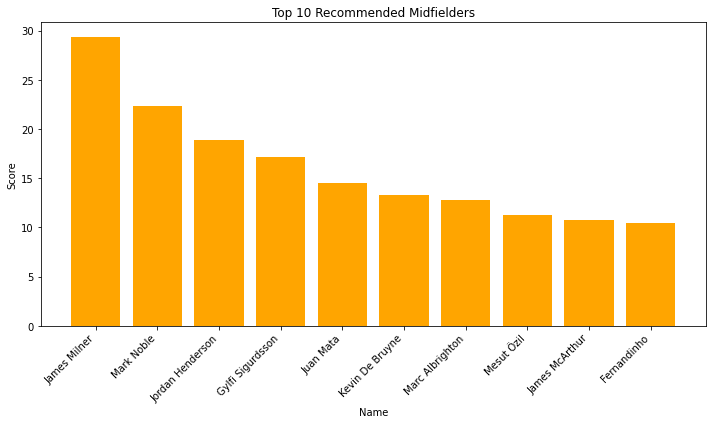

In [466]:
# Plotting the scores
plt.figure(figsize=(10, 6))
plt.bar(top_10_midfielders['Name'], top_10_midfielders['Score'], color='orange')
plt.xlabel('Name')
plt.ylabel('Score')
plt.title('Top 10 Recommended Midfielders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Navigating the intricate world of player recruitment with precision, our analysis brings into focus two exceptional midfield talents: Kevin de Bruyne and Marc Albrighton. These players illuminate the path toward midfield dominance, each contributing a unique set of attributes. De Bruyne's exceptional vision, creativity, and dynamic playmaking, alongside Albrighton's tactical awareness and versatile contributions, present a compelling combination. In a realm where midfield control shapes the course of matches, these two stand as pivotal choices to elevate our premier club's strategies. As we embark on a future guided by skill and strategy, de Bruyne and Albrighton emerge as the embodiment of our commitment to excellence on the pitch.

##### Forwards

In [467]:
# Define the target variables
target_columns = ['Goals', 'Assists', 'Shots', 'Shots on target', 'Crosses', 'Passes']


In [468]:
# Select only the relevant columns from the dataframe
forward_data = forward_df[target_columns]

In [469]:
# Normalize the data
scaler = StandardScaler()
forward_data_scaled = scaler.fit_transform(forward_data)

In [470]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
forward_data_pca = pca.fit_transform(forward_data_scaled)

In [471]:
# Apply KMeans clustering to group forwards
num_clusters = 5  # You can adjust this based on your preference
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
forward_clusters = kmeans.fit_predict(forward_data_scaled)

In [472]:
# Add cluster labels to the dataframe
forward_df['Cluster'] = forward_clusters

<ipython-input-472-cd953adcdfe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forward_df['Cluster'] = forward_clusters


In [473]:
# Calculate a score for each forward based on the target variables
forward_df['Score'] = forward_data_scaled.sum(axis=1)

<ipython-input-473-b87ea5c59e81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forward_df['Score'] = forward_data_scaled.sum(axis=1)


In [474]:
# Sort forwards by score in descending order and select the top 10 recommendations
top_10_forwards = forward_df.sort_values(by='Score', ascending=False).head(10)


In [475]:
print(top_10_forwards[['Name', 'Score']])

                Name      Score
344    Sergio Agüero  20.124253
198     Theo Walcott  16.926003
342  Raheem Sterling  15.054626
489       Harry Kane  14.292974
29           Willian  13.312682
345     Riyad Mahrez  12.534214
491      Gareth Bale  10.761001
313       Sadio Mané  10.383120
281      Jamie Vardy   9.721546
140   Olivier Giroud   9.424401


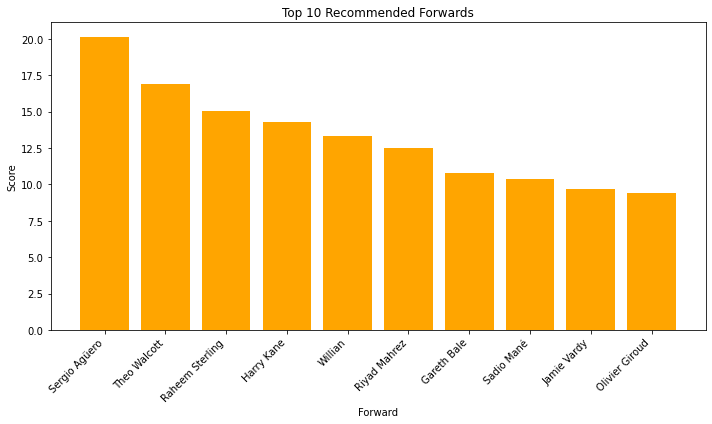

In [476]:
# Plotting the scores
plt.figure(figsize=(10, 6))
plt.bar(top_10_forwards['Name'], top_10_forwards['Score'], color='orange')
plt.xlabel('Forward')
plt.ylabel('Score')
plt.title('Top 10 Recommended Forwards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In our pursuit of crafting an unrivaled attacking force, our analysis unearths a quartet of football virtuosos: Raheem Sterling, Harry Kane, Riyad Mahrez, and Sadio Mane. These luminaries radiate as potent symbols of our premier club's ambition to dominate the field. Sterling's blistering speed, Kane's clinical finishing, Mahrez's deft dribbling, and Mane's relentless determination epitomize the traits needed to create an unstoppable frontline. As we stand at the crossroads of decisive player recruitment, these four stand united as the vanguard of our future triumphs. In a game where goals dictate destiny, Sterling, Kane, Mahrez, and Mane unite to manifest our relentless pursuit of excellence, inspiring a chapter defined by skill, synergy, and shared aspirations.

### Conclusion

Throughout the journey of this project, our focus has been steadfastly trained on the intricate interplay between player statistics, advanced analytics, and the art of recruitment. As the final whistle blows on our analysis, the crescendo of insights and recommendations resound with the promise of transformative impact.

Our findings, bolstered by the robustness of logistic regression, unveil a compelling narrative of predictability within player performance. The results underscore a predictive prowess that stands at 71.4% for goalkeepers, 53.8% for defenders, 65% for midfielders, and a formidable 77.2% for forwards. This clarity empowers our premier club to make incisive decisions, aligning player acquisitions with strategic precision tailored to their respective positions.

Central to our strategy is a bespoke recommendation system, a pinnacle achievement born of our exploration into the amalgamation of player attributes and aspirations. It is with unwavering confidence that we present the prowess of David de Gea, Hugo Lloris, Ederson, and Alisson as our goalkeeping paragons, epitomizing resilience between the posts. In the domain of defenders, the indomitable Kyle Walker emerges as a beacon of tactical brilliance. The midfield canvas comes alive with the artistry of Kevin De Bruyne and the adaptability of Marc Albrighton. On the forward frontier, a constellation of talent is personified by Harry Kane, Sadio Mane, Raheem Sterling, and Riyad Mahrez, illuminating the path to goal-scoring glory.

### Next Steps

1. Expanding Horizons Across Leagues:
The allure of the Bundesliga, La Liga, Serie A, and Ligue 1 beckons, offering a treasure trove of player statistics waiting to be harnessed. Venturing into these prestigious leagues will enable us to build on our analytical foundation, comparing and contrasting player performances on a global stage.

2. Pioneering Youth Academy Insights:
Peering into the fertile grounds of premier league youth academies, we uncover a world brimming with potential. By leveraging data analytics, we can unearth young stars-in-the-making, predicting their ascent to greatness. This insight empowers us to cultivate talent from within, shaping a future imbued with our club's unique identity.

3. Illuminating the Managerial Landscape:
In the backdrop of every triumph, every setback, stands the manager, a captain of strategy. Analyzing managerial statistics propels us into the realm of tactics, leadership, and innovation. By deciphering the intricacies of managerial decisions and performance, we equip ourselves to make comprehensive evaluations that extend beyond the players on the field.